In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import matplotlib.image as mpimg
import random
##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
98342,00025975_000.png,No Finding,0,25975,47,M,PA,3056,2544,0.139,0.139,NaN
43190,00011144_003.png,No Finding,3,11144,67,M,PA,2992,2991,0.143,0.143,NaN
69050,00017041_000.png,No Finding,0,17041,33,F,PA,2992,2469,0.143,0.143,NaN
46546,00011894_001.png,No Finding,1,11894,22,M,AP,2500,2048,0.168,0.168,NaN
45465,00011658_000.png,No Finding,0,11658,54,M,PA,2992,2991,0.143,0.143,NaN


In [3]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
3075,00015160_002.png,No Finding,2,15160,038Y,F,PA,2986,2991,0.143,0.143
4419,00021843_002.png,No Finding,2,21843,052Y,F,AP,3012,2544,0.139,0.139
2886,00014251_008.png,Infiltration,8,14251,068Y,M,AP,2500,2048,0.168,0.168
3308,00016333_005.png,No Finding,5,16333,046Y,M,PA,2706,2991,0.143,0.143
346,00001836_076.png,Mass|Nodule,76,1836,050Y,F,AP,2500,2048,0.168,0.168


In [4]:
## EDA
# Todo 
print (f"length of NIH Data {len(all_xray_df)}")
print (f"length of Sample Data {len(sample_df)}")

length of NIH Data 112120
length of Sample Data 5606


Distribution of Patients Age & Gender

Text(0.5, 1.0, 'Patient Age Distribution')

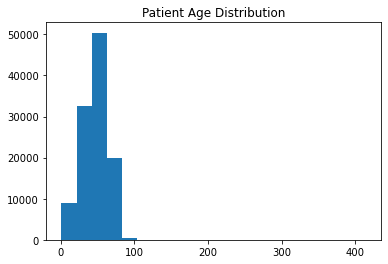

In [5]:
plt.hist(all_xray_df['Patient Age'],bins=20)
plt.title('Patient Age Distribution')

In [6]:
max_age=all_xray_df['Patient Age'].max()
print (f"{max_age} seems like wrong entry in the Age column. There could be more wrong entries") 

414 seems like wrong entry in the Age column. There could be more wrong entries


Text(0.5, 1.0, 'Position Distribution')

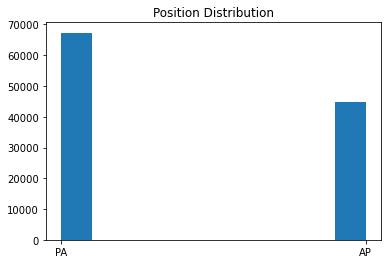

In [7]:
plt.hist(all_xray_df['View Position'])
plt.title('Position Distribution')

Text(0.5, 1.0, 'Patient Gender Distribution')

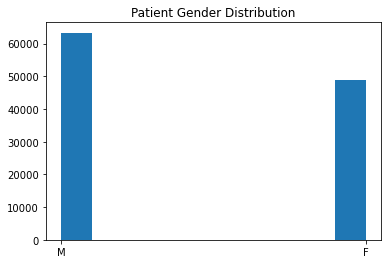

In [8]:
plt.hist(all_xray_df['Patient Gender'])
plt.title('Patient Gender Distribution')

Extracting diseases lables from Finding Labels columns

In [10]:
disease_list=np.unique(list(itertools.chain(*all_xray_df['Finding Labels'].apply(lambda x: x.split('|')))))

In [11]:
disease_list

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'], dtype='<U18')

In [12]:
def disease_column_adder(df,disease_list):
    x=[]
    for i in range(len(df)):
        xi=[]
        for disease in disease_list:
            if disease in df['Finding Labels'].iloc[i]:
                xi.append(1)
            else:
                xi.append(0)
        x.append(xi)
    disease_df=pd.DataFrame(x,columns=disease_list)
    df2=pd.concat([df,disease_df],axis=1)
    return df2

In [13]:
sample_df_1=disease_column_adder(sample_df,disease_list)

In [14]:
all_xray_df_1=disease_column_adder(all_xray_df,disease_list)

In [15]:
all_xray_df_1.head(4)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,0,1,0,0,0,0


Counting numbers of patients for each disease

In [16]:
for disease in disease_list:
    print (f"Percentage of patients with {disease}={np.round(100*sum(all_xray_df_1[disease])/len(all_xray_df_1),2)}\n")

Percentage of patients with Atelectasis=10.31

Percentage of patients with Cardiomegaly=2.48

Percentage of patients with Consolidation=4.16

Percentage of patients with Edema=2.05

Percentage of patients with Effusion=11.88

Percentage of patients with Emphysema=2.24

Percentage of patients with Fibrosis=1.5

Percentage of patients with Hernia=0.2

Percentage of patients with Infiltration=17.74

Percentage of patients with Mass=5.16

Percentage of patients with No Finding=53.84

Percentage of patients with Nodule=5.65

Percentage of patients with Pleural_Thickening=3.02

Percentage of patients with Pneumonia=1.28

Percentage of patients with Pneumothorax=4.73



Only a small fraction (1.2 %) of patients have Pneumonia.  

Counting of number of patients that have other diseases too along with Pneumonia 

In [17]:
for disease in disease_list:
    if disease!= 'Pneumonia':
        print (f"Number of patients with {disease} and Pneumonia={sum(all_xray_df_1.loc[all_xray_df_1['Pneumonia']==1,disease])}\n")     

Number of patients with Atelectasis and Pneumonia=262

Number of patients with Cardiomegaly and Pneumonia=41

Number of patients with Consolidation and Pneumonia=123

Number of patients with Edema and Pneumonia=340

Number of patients with Effusion and Pneumonia=269

Number of patients with Emphysema and Pneumonia=23

Number of patients with Fibrosis and Pneumonia=11

Number of patients with Hernia and Pneumonia=3

Number of patients with Infiltration and Pneumonia=605

Number of patients with Mass and Pneumonia=71

Number of patients with No Finding and Pneumonia=0

Number of patients with Nodule and Pneumonia=70

Number of patients with Pleural_Thickening and Pneumonia=48

Number of patients with Pneumothorax and Pneumonia=41



Counting number of disease per patient

In [104]:
disease_list_1=disease_list[disease_list!='No Finding']
all_xray_df_1['Total_Number_Disease']=all_xray_df_1.loc[:,disease_list_1].sum(axis=1)
all_xray_df_1.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Total_Number_Disease
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,1
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,0,0,0,0,0,2
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,2
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,1,0,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,1,0,0,0,0,0,0,0,1


ValueError: either both or neither of x and y should be given

Pixel-level assessments of the imaging data

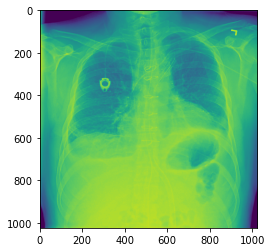

In [63]:
# Visualize a random image
r=np.random.randint(0,len(sample_df))
sample_img_file=sample_df['Image Index'].iloc[r]
sample_img_path='/data/images*/images/'+sample_img_file
img=mpimg.imread(glob(sample_img_path)[0])
plt.imshow(img)

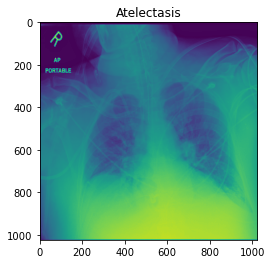

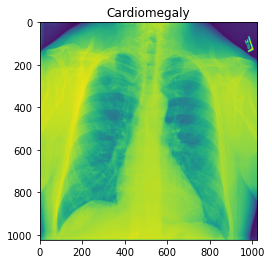

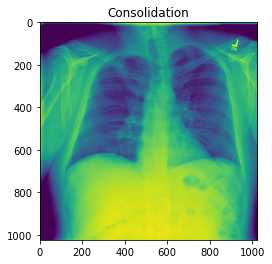

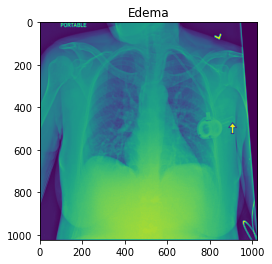

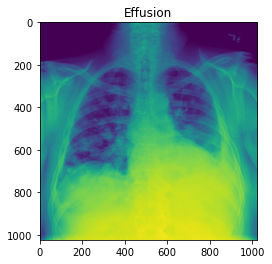

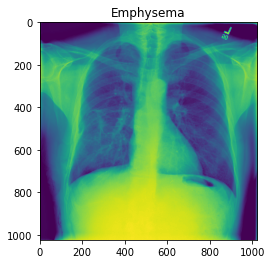

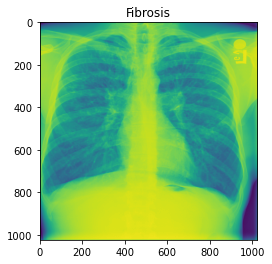

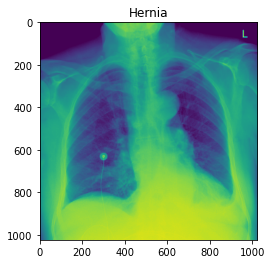

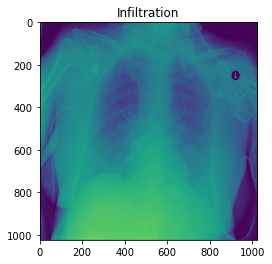

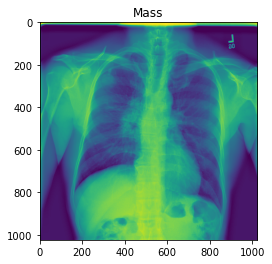

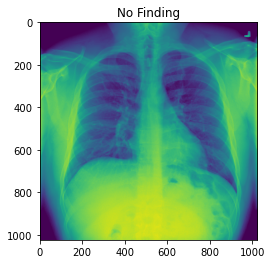

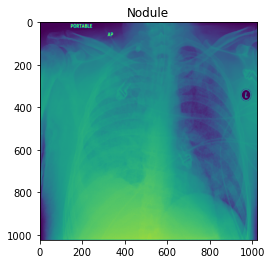

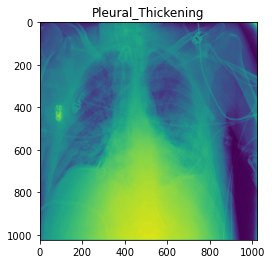

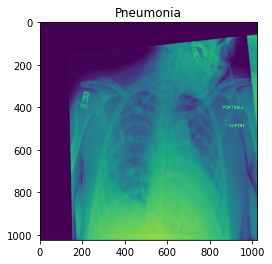

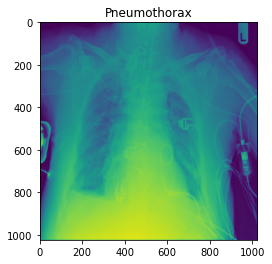

In [92]:
# Visualize one image for  each disease
c=0
for disease in disease_list:
    idx=sample_df_1[sample_df_1[disease]==1].index
    r=random.sample(set(idx),1)
    sample_img_file=sample_df.loc[r,'Image Index']
    sample_img_path='/data/images*/images/'+sample_img_file
    img=mpimg.imread(glob(sample_img_path.values[0])[0])
    plt.figure(c)
    plt.imshow(img)
    plt.title(disease)
    c+=1
    #plt.figure(c)
    #plt.hist(img.ravel())
    #plt.title(disease)

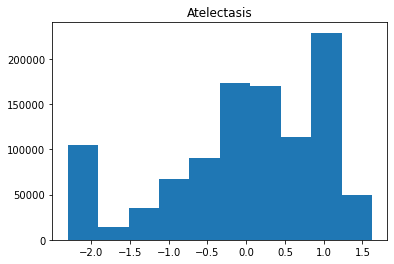

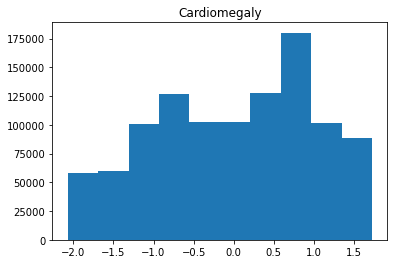

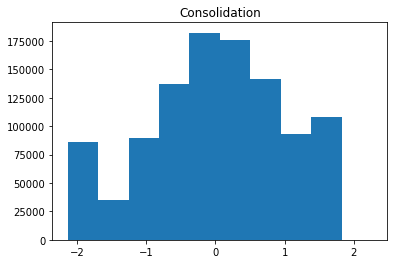

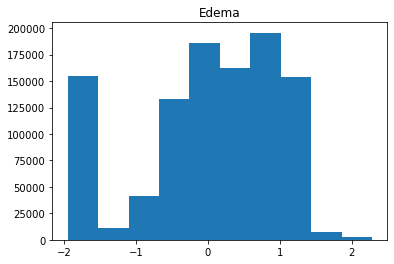

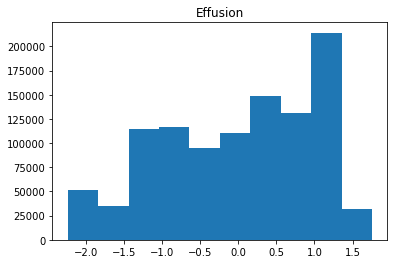

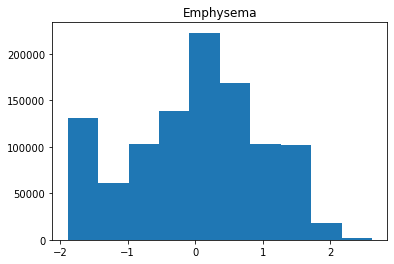

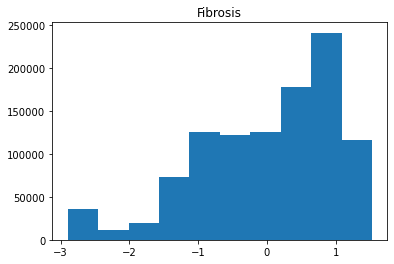

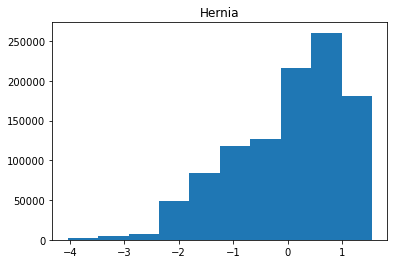

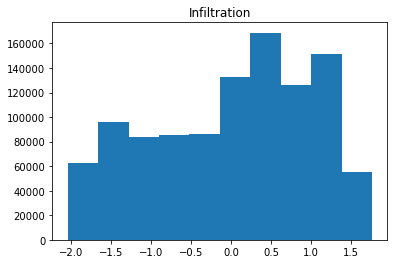

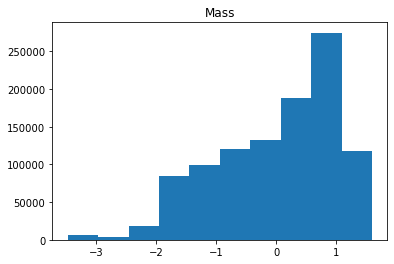

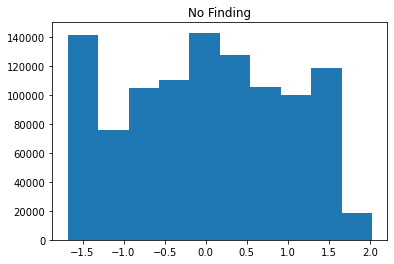

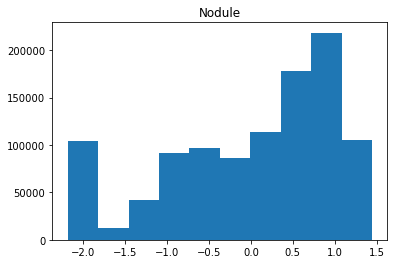

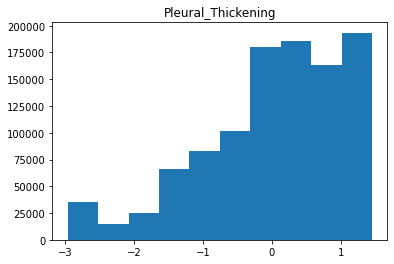

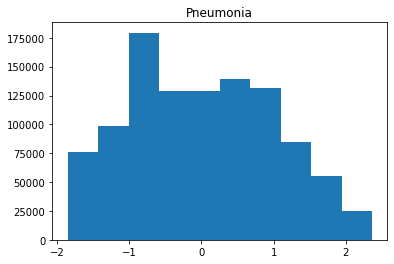

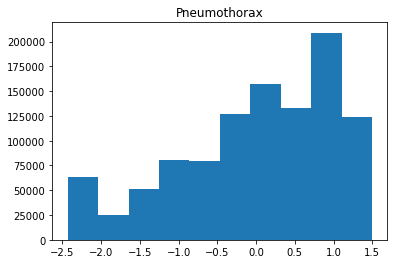

In [95]:
# Visualize intensities
c=0
for disease in disease_list:
    idx=sample_df_1[sample_df_1[disease]==1].index
    r=random.sample(set(idx),1)
    sample_img_file=sample_df.loc[r,'Image Index']
    sample_img_path='/data/images*/images/'+sample_img_file
    img=mpimg.imread(glob(sample_img_path.values[0])[0])
    img1=(img-np.mean(img))/np.std(img)
    plt.figure(c)
    plt.hist(img1.ravel())
    plt.title(disease)
    c+=1